In [11]:
import pandas as pd
import numpy as np
import nltk
import string
import re
from nltk.tokenize import sent_tokenize, word_tokenize

def remove_between_square_brackets(text):
  return re.sub('\[[^]]*\]', '', text)

def remove_special_characters(text, remove_digits=True):
  pattern=r'[^a-zA-z0-9\s]'
  text=re.sub(pattern,'',text) 
  return text

def get_word_count(text):
    stopwords_list = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
    word_count = {}
    for sent in sent_tokenize(text):
        for word in word_tokenize(sent):
            if word in word_count and word not in stopwords_list and word not in string.punctuation:
                word_count[word] += 1
            elif word not in word_count and word not in stopwords_list and word not in string.punctuation:
                word_count[word] = 1
    return word_count

def tokenize_text(text):
    return [word for sent in sent_tokenize(text) for word in word_tokenize(sent)]

def replace_text_stemming(text):
    stemmer = nltk.stem.PorterStemmer()
    stems = [stemmer.stem(word) for word in tokenize_text(text)]
    return " ".join(stems)

def get_vector(text, vocabulary):
    tokens = tokenize_text(text)
    vector = np.zeros(len(vocabulary))
    for token in tokens:
        if token in vocabulary:
            vector[list(vocabulary.keys()).index(token)]+= 1
    return vector
    
def get_features_labels(df, label_column_name):
    if 'Unnamed: 0' in df.columns:
        df.drop('Unnamed: 0', 1, inplace=True)
    labels = df[label_column_name]
    train_features = df.drop(label_column_name, 1)
    return train_features, labels.to_numpy()

def feature_extraction(data, vocab):
    """
    Optional helper method to code the feature extraction function to transform the raw dataset into a processed
    dataset to be used in perceptron training.
    """
    df = []
    for i in range(0, data.shape[0]):
        df.append(Pre.get_vector(data.iloc[i]['Text'], vocab))
    return np.array(df)

def build_vocab(dataset):
    text_corpus = ""
    for i in range(0, dataset.shape[0]):
        text_corpus += " " + dataset.iloc[i]['Text']
    text_corpus = text_corpus.lower()
    text_corpus = remove_between_square_brackets(text_corpus)
    text_corpus = remove_special_characters(text_corpus, True)
    
    stemmed_corpus = replace_text_stemming(text_corpus)
    vocabulary = get_word_count(stemmed_corpus)
    updated_vocab = {}
    for key in vocabulary.keys():
        if(vocabulary[key]>0.01*dataset.shape[0] and vocabulary[key]<2*dataset.shape[0]):
            updated_vocab[key] = vocabulary[key]
    return updated_vocab

In [4]:
all_data = pd.read_csv('data.csv', index_col=0)
vocab = build_vocab(all_data)
len(vocab)

4488

In [23]:
import numpy as np
import Preprocess as Pre

class Perceptron():
    def __init__(self):
        """
        The __init__ function initializes the instance attributes for the class. There should be no inputs to this
        function at all. However, you can setup whatever instance attributes you would like to initialize for this
        class. Below, I have just placed as an example the weights and bias of the perceptron as instance attributes.
        """
        self.vocabulary = None
        self.weights = None
        self.bias = None
    
    # def get_vocab(self, dataset):
    #     self.vocabulary = Pre.build_vocab(dataset)

    # def feature_extraction(self, data):
    #     """
    #     Optional helper method to code the feature extraction function to transform the raw dataset into a processed
    #     dataset to be used in perceptron training.
    #     """
    #     df = []
    #     for i in range(0, data.shape[0]):
    #         df.append(Pre.get_vector(data.iloc[i]['Text'], self.vocabulary))
    #     return np.array(df)

    def sgn_function(self, perceptron_input):
        """
        Optional helper method to code the sign function for the perceptron.
        """
        if perceptron_input <=0: return 0
        return 1

    def update_weights(self, update, feature):
        """
        Optional helper method to update the weights of the perceptron.
        """
        new_weights = update * feature
        self.weights += new_weights

    def update_bias(self, update):
        """
        Optional helper method to update the bias of the perceptron.
        """
        self.bias += update

    def predict_labels(self, data_point):
        """
        Optional helper method to produce predictions for a single data point.
        """
        prediction = np.dot(data_point, self.weights) + self.bias
        return self.sgn_function(prediction)

    def train(self, labeled_data, y, vocab, learning_rate=0.1, max_iter=50):
        """
        You must implement this function and it must take in as input data in the form of a pandas dataframe. This
        dataframe must have the label of the data points stored in a column called 'Label'. For example, the column
        labeled_data['Label'] must return the labels of every data point in the dataset. Additionally, this function
        should not return anything.

        The hyperparameters for training will be the learning rate and max number of iterations. Once you find the
        optimal values of the hyperparameters, update the default values for each keyword argument to reflect those
        values.

        The goal of this function is to train the perceptron on the labeled data. Feel free to code this however you
        want.
        """
        # self.get_vocab(labeled_data)
        # X, y = Pre.get_features_labels(labeled_data, 'Label')
        # X = self.feature_extraction(X)
        self.vocabulary = vocab


        # initialize weights
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(max_iter):
            
            for idx, x_feature in enumerate(X):
                output = np.dot(x_feature, self.weights) + self.bias
                y_predicted = self.sgn_function(output)

                # Perceptron update rule
                update = learning_rate * (y[idx] - y_predicted)
                self.update_weights(update, x_feature)
                self.update_bias(update)
        return

    def predict(self, X):
        predicted_labels = []
        """
        This function is designed to produce labels on some data input. The first input is the data in the form of a 
        pandas dataframe. 
        
        Finally, you must return the variable predicted_labels which should contain a list of all the 
        predicted labels on the input dataset. This list should only contain integers that are either 0 (negative) or 1
        (positive) for each data point.
        
        The rest of the implementation can be fully customized.
        """
        # X, y = Pre.get_features_labels(data, 'Label')
        # X = self.feature_extraction(X)

        for feat in X:
            predicted_labels.append(self.predict_labels(feat))
        return predicted_labels


In [6]:
def split_dataset(all_data):
    test_data = all_data.sample(random_state = 47, frac = 0.2)
    train_data = all_data.drop(test_data.index)
    return train_data, test_data

In [36]:
def accuracy(orig, pred):
    num = len(orig)
    if (num != len(pred)):
        print('Error!! Num of labels are not equal.')
        return
    match = 0
    for i in range(len(orig)):
        o_label = orig[i]
        p_label = pred[i]
        if (o_label == p_label):
            match += 1
    # print('***************\nAccuracy: '+str(float(match) / num)+'\n***************')
    return (float(match) / num)

In [33]:
def eval(o_train, p_train, o_val, p_val):
    # print('\nTraining Accuracy Result!')
    train_accuracy = accuracy(o_train, p_train)
    # print('\nTesting Accuracy Result!')
    val_accuracy = accuracy(o_val, p_val)
    return train_accuracy, val_accuracy

In [34]:
def get_kfold_split(train_set, fold_number):
    # train_set = pd.read_csv(input_filename)
    # train_set = train_set.sample(random_state=18, frac=1)
    # fold_number = 10
    fold_size=len(train_set)/fold_number
    fold_data_list=[]
    for i in range(fold_number):
        new_fold=train_set.iloc[int(i*fold_size):int((i+1)*fold_size),:]
        fold_data_list.append(new_fold)
    return fold_data_list

def get_train_test_data(fold_data_list, ind):
    test_set = fold_data_list[ind]
    rem_set = []
    for k, data in enumerate(fold_data_list):
        if(k!=ind):
            rem_set.append(fold_data_list[k])
    # new_train_set = pd.concat(rem_set)
    train_set = pd.concat(rem_set)
    # new_train_set = new_train_set.sample(random_state=32, frac=fraction)
    # new_X_train, new_y_train = q2.get_features_labels(new_train_set)
    # new_X_test, new_y_test = q2.get_features_labels(test_set)
    return train_set, test_set

In [29]:
perceptron = Perceptron()
X, y = get_features_labels(train_data, 'Label')
X = feature_extraction(X, vocab)
perceptron.train(X, y, vocab)
X_test,y_test = get_features_labels(test_data, 'Label')
X_test = feature_extraction(X_test, vocab)
predicted_train_labels_perceptron = perceptron.predict(X)
predicted_test_labels_perceptron = perceptron.predict(X_test)
train_accuracy, val_accuracy = eval(train_data['Label'].tolist(), predicted_train_labels_perceptron, test_data['Label'].tolist(),predicted_test_labels_perceptron)
print("Train:", train_accuracy)
print("Test:", val_accuracy)

C:\Users\garga\AppData\Local\Temp/ipykernel_36820/3622175329.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_features = df.drop(label_column_name, 1)



Training Accuracy Result!
***************
Accuracy: 1.0
***************

Testing Accuracy Result!
***************
Accuracy: 0.8264705882352941
***************
Train: 1.0
Test: 0.8264705882352941


In [ ]:
def plot_curves(learning_rate_list, val_iter_list, train_iter_list, iter):
    plt.plot(learning_rate_list, train_iter_list, label = "Training Accuracy", marker = 'o')
    plt.plot(learning_rate_list,val_iter_list, label = "Testing Accuracy", marker = 'o')
    plt.title("Accuracy comparison for {} Epochs".format(iter))
    plt.xlabel("Learning Rate")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [44]:

train_data, test_data = split_dataset(all_data)
fold_num = 5
fold_data_list = get_kfold_split(all_data, fold_num)
max_iter_list = [1,5,10,20,50]
learning_rate_list = [0.005, 0.01, 0.05, 0.1, 0.2]
train_iter_list = []
val_iter_list = []
for l in learning_rate_list:
    print("Current learning rate:", l)
    train_learn_list = []
    val_learn_list = []
    for ind in range(fold_num):
        # print("Current index :", ind)
        train_data, test_data = get_train_test_data(fold_data_list,ind)
        X, y = get_features_labels(train_data, 'Label')
        X = feature_extraction(X, vocab)
        perceptron.train(X, y, vocab, l, 5)
        X_test,y_test = get_features_labels(test_data, 'Label')
        X_test = feature_extraction(X_test, vocab)
        predicted_train_labels_perceptron = perceptron.predict(X)
        predicted_test_labels_perceptron = perceptron.predict(X_test)
        train_accuracy, val_accuracy = eval(train_data['Label'].tolist(), predicted_train_labels_perceptron, test_data['Label'].tolist(),predicted_test_labels_perceptron)
        train_learn_list.append(train_accuracy)
        val_learn_list.append(val_accuracy)
        # print('Train List: {}, Validation List: {}'.format(train_learn_list, val_learn_list))
    train_mean = np.mean(train_learn_list)
    val_mean = np.mean(val_learn_list)
    print('Train List Mean: {}, Validation List Mean: {}'.format(train_mean, val_mean))
    train_iter_list.append(train_mean)
    val_iter_list.append(val_mean)

Current learning rate: 0.005


C:\Users\garga\AppData\Local\Temp/ipykernel_36820/3622175329.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_features = df.drop(label_column_name, 1)


Train List Mean: 0.9773529411764705, Validation List Mean: 0.74
Current learning rate: 0.01
Train List Mean: 0.9773529411764705, Validation List Mean: 0.74
Current learning rate: 0.05
Train List Mean: 0.9683823529411765, Validation List Mean: 0.7588235294117647
Current learning rate: 0.1
Train List Mean: 0.9683823529411765, Validation List Mean: 0.7588235294117647
Current learning rate: 0.2
Train List Mean: 0.9683823529411765, Validation List Mean: 0.7588235294117647


In [88]:
"""
You may need to import necessary modules like numpy and pandas. However, you can't use any external
libraries such as sci-kit learn, etc. to implement the perceptron and the training of the perceptron.
The implementation must be done completely by yourself.

We are allowing you to use two packages from nltk for text processing: nltk.stem and nltk.tokenize. You cannot import
nltk in general, but we are allowing the use of these two packages only. We will check the code in your programs to
make sure this is the case and if other packages in nltk are used then we will deduct points from your assignment.
"""

"""
This is a Python class meant to represent the perceptron model and any sort of feature processing that you may do. You 
have a lot of flexibility on how you want to implement the training of the perceptron but below I have listed 
functionality that should not change:
    - Arguments to the __init__ function 
    - Arguments and return statement of the train function
    - Arguments and return statement of the predict function 


When you want the program (perceptron) to train on a dataset, the train function will only take one input which is the 
raw copy of the data file as a pandas dataframe. Below, is example code of how this is done:

    data = pd.read_csv('data.csv', index_col=0)
    model = Perceptron()
    model.train(data) # Train the model on data.csv


It is assumed when this program is evaluated, the predict function takes one input which is the raw copy of the
data file as a pandas dataframe and produce as output the list of predicted labels. Below is example code of how this 
is done:

    data = pd.read_csv('data.csv', index_col=0)
    model = Perceptron()
    predicted_labels = model.predict(data) # Produce predictions using model on data.csv

I have added several optional helper methods for you to use in building the pipeline of training the perceptron. It is
up to your discretion on if you want to use them or add your own methods.
"""


# class Perceptron():
#     def __init__(self):
#         """
#         The __init__ function initializes the instance attributes for the class. There should be no inputs to this
#         function at all. However, you can setup whatever instance attributes you would like to initialize for this
#         class. Below, I have just placed as an example the weights and bias of the perceptron as instance attributes.
#         """
#         self.weights = None
#         self.bias = None

#     def feature_extraction(self):
#         """
#         Optional helper method to code the feature extraction function to transform the raw dataset into a processed
#         dataset to be used in perceptron training.
#         """
#         return

#     def sgn_function(self, perceptron_input):
#         """
#         Optional helper method to code the sign function for the perceptron.
#         """
#         return

#     def update_weights(self, new_weights):
#         """
#         Optional helper method to update the weights of the perceptron.
#         """
#         self.weights = new_weights

#     def update_bias(self, new_bias):
#         """
#         Optional helper method to update the bias of the perceptron.
#         """
#         self.bias = new_bias

#     def predict_labels(self, data_point):
#         """
#         Optional helper method to produce predictions for a single data point.
#         """
#         return

#     def train(self, labeled_data, learning_rate=None, max_iter=None):
#         """
#         You must implement this function and it must take in as input data in the form of a pandas dataframe. This
#         dataframe must have the label of the data points stored in a column called 'Label'. For example, the column
#         labeled_data['Label'] must return the labels of every data point in the dataset. Additionally, this function
#         should not return anything.

#         The hyperparameters for training will be the learning rate and max number of iterations. Once you find the
#         optimal values of the hyperparameters, update the default values for each keyword argument to reflect those
#         values.

#         The goal of this function is to train the perceptron on the labeled data. Feel free to code this however you
#         want.
#         """
#         return

#     def predict(self, data):
#         predicted_labels = []
#         """
#         This function is designed to produce labels on some data input. The first input is the data in the form of a 
#         pandas dataframe. 
        
#         Finally, you must return the variable predicted_labels which should contain a list of all the 
#         predicted labels on the input dataset. This list should only contain integers that are either 0 (negative) or 1
#         (positive) for each data point.
        
#         The rest of the implementation can be fully customized.
#         """
#         return predicted_labels

import numpy as np
import Preprocess as Pre

class Perceptron():
    def __init__(self):
        """
        The __init__ function initializes the instance attributes for the class. There should be no inputs to this
        function at all. However, you can setup whatever instance attributes you would like to initialize for this
        class. Below, I have just placed as an example the weights and bias of the perceptron as instance attributes.
        """
        self.vocabulary = None
        self.weights = None
        self.bias = None
    
    def get_vocab(self, dataset):
        self.vocabulary = Pre.build_vocab(dataset)

    def feature_extraction(self, data):
        """
        Optional helper method to code the feature extraction function to transform the raw dataset into a processed
        dataset to be used in perceptron training.
        """
        df = []
        for i in range(0, data.shape[0]):
            df.append(Pre.get_vector(data.iloc[i]['Text'], self.vocabulary))
        return np.array(df)

    def sgn_function(self, perceptron_input):
        """
        Optional helper method to code the sign function for the perceptron.
        """
        if perceptron_input <=0: return 0
        return 1

    def update_weights(self, update, feature):
        """
        Optional helper method to update the weights of the perceptron.
        """
        new_weights = update * feature
        self.weights += new_weights

    def update_bias(self, update):
        """
        Optional helper method to update the bias of the perceptron.
        """
        self.bias += update

    def predict_labels_cross_Validation(self, data_point):
        """
        Optional helper method to produce predictions for a single data point
        """
        prediction = np.dot(data_point, self.weights) + self.bias
        return self.sgn_function(prediction)
    
    def predict_labels(self, data_point):
        """
        Optional helper method to produce predictions for a single data point.
        """
        prediction = np.dot(data_point, self.weights) + self.bias
        return self.sgn_function(prediction)

    def train(self, labeled_data, learning_rate=0.1, max_iter=50):
        """
        You must implement this function and it must take in as input data in the form of a pandas dataframe. This
        dataframe must have the label of the data points stored in a column called 'Label'. For example, the column
        labeled_data['Label'] must return the labels of every data point in the dataset. Additionally, this function
        should not return anything.

        The hyperparameters for training will be the learning rate and max number of iterations. Once you find the
        optimal values of the hyperparameters, update the default values for each keyword argument to reflect those
        values.

        The goal of this function is to train the perceptron on the labeled data. Feel free to code this however you
        want.
        """
        self.get_vocab(labeled_data)
        X, y = Pre.get_features_labels(labeled_data, 'Label')
        X = self.feature_extraction(X)

        # initialize weights
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(max_iter):
            
            for idx, x_feature in enumerate(X):
                output = np.dot(x_feature, self.weights) + self.bias
                y_predicted = self.sgn_function(output)

                # Perceptron update rule
                update = learning_rate * (y[idx] - y_predicted)
                self.update_weights(update, x_feature)
                self.update_bias(update)
        return
    
    def train_cross_validation(self, X, y, learning_rate = 0.1, max_iter = 50):
        # bias = np.ones((X.shape[0], 1))
        # X = np.concatenate((bias, X), axis=1)        

        # initialize weights
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(max_iter):
            
            for idx, x_feature in enumerate(X):
                output = np.dot(x_feature, self.weights) + self.bias
                y_predicted = self.sgn_function(output)

                # Perceptron update rule
                update = learning_rate * (y[idx] - y_predicted)
                self.update_weights(update, x_feature)
                self.update_bias(update)

    def predict(self, data):
        predicted_labels = []
        """
        This function is designed to produce labels on some data input. The first input is the data in the form of a 
        pandas dataframe. 
        
        Finally, you must return the variable predicted_labels which should contain a list of all the 
        predicted labels on the input dataset. This list should only contain integers that are either 0 (negative) or 1
        (positive) for each data point.
        
        The rest of the implementation can be fully customized.
        """
        X, y = Pre.get_features_labels(data, 'Label')
        X = self.feature_extraction(X)

        for feat in X:
            predicted_labels.append(self.predict_labels(feat))
        return predicted_labels

    def predict_cross_validation(self, X):
        predicted_labels = []
        for feat in X:
            predicted_labels.append(self.predict_labels_cross_Validation(feat))
        return predicted_labels


Split dataset


C:\Users\garga\AppData\Local\Temp/ipykernel_36820/3622175329.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_features = df.drop(label_column_name, 1)


Extracted all features
Starting model iteration
Current learning rate: 0.001
Fold: 0, Train Acc: 0.8538602941176471, Validation Acc: 0.7132352941176471
Fold: 1, Train Acc: 0.8556985294117647, Validation Acc: 0.7022058823529411


C:\Users\garga\AppData\Local\Temp/ipykernel_36820/1971367710.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  perceptron.train_cross_validation(X.drop('Label',1).to_numpy(),X['Label'].to_numpy(), l, iter)
C:\Users\garga\AppData\Local\Temp/ipykernel_36820/1971367710.py:31: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  predicted_train_labels_logistic = perceptron.predict_cross_validation(X.drop('Label',1).to_numpy())
C:\Users\garga\AppData\Local\Temp/ipykernel_36820/1971367710.py:32: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  predicted_test_labels_logistic = perceptron.predict_cross_validation(X_test.drop('Label',1).to_numpy())


Fold: 2, Train Acc: 0.8520220588235294, Validation Acc: 0.7242647058823529
Fold: 3, Train Acc: 0.8685661764705882, Validation Acc: 0.6911764705882353
Fold: 4, Train Acc: 0.8474264705882353, Validation Acc: 0.7132352941176471
Train List Mean: 0.8555147058823529, Validation List Mean: 0.7088235294117647
Current learning rate: 0.005
Fold: 0, Train Acc: 0.8501838235294118, Validation Acc: 0.7242647058823529
Fold: 1, Train Acc: 0.8272058823529411, Validation Acc: 0.7058823529411765
Fold: 2, Train Acc: 0.8556985294117647, Validation Acc: 0.7132352941176471
Fold: 3, Train Acc: 0.84375, Validation Acc: 0.6617647058823529
Fold: 4, Train Acc: 0.8428308823529411, Validation Acc: 0.6911764705882353
Train List Mean: 0.8439338235294118, Validation List Mean: 0.6992647058823529
Current learning rate: 0.01
Fold: 0, Train Acc: 0.8501838235294118, Validation Acc: 0.7242647058823529
Fold: 1, Train Acc: 0.8272058823529411, Validation Acc: 0.7058823529411765
Fold: 2, Train Acc: 0.8556985294117647, Validati

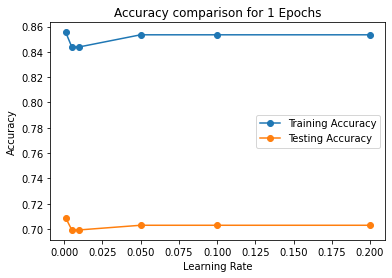

Current learning rate: 0.001
Fold: 0, Train Acc: 0.9935661764705882, Validation Acc: 0.7352941176470589
Fold: 1, Train Acc: 0.984375, Validation Acc: 0.7352941176470589
Fold: 2, Train Acc: 0.9825367647058824, Validation Acc: 0.7830882352941176
Fold: 3, Train Acc: 0.9852941176470589, Validation Acc: 0.6764705882352942
Fold: 4, Train Acc: 0.9917279411764706, Validation Acc: 0.7132352941176471
Train List Mean: 0.9875, Validation List Mean: 0.7286764705882354
Current learning rate: 0.005
Fold: 0, Train Acc: 0.9981617647058824, Validation Acc: 0.7904411764705882
Fold: 1, Train Acc: 0.9981617647058824, Validation Acc: 0.6948529411764706
Fold: 2, Train Acc: 0.9981617647058824, Validation Acc: 0.7536764705882353
Fold: 3, Train Acc: 0.9981617647058824, Validation Acc: 0.7389705882352942
Fold: 4, Train Acc: 0.9926470588235294, Validation Acc: 0.7647058823529411
Train List Mean: 0.9970588235294118, Validation List Mean: 0.748529411764706
Current learning rate: 0.01
Fold: 0, Train Acc: 0.998161764

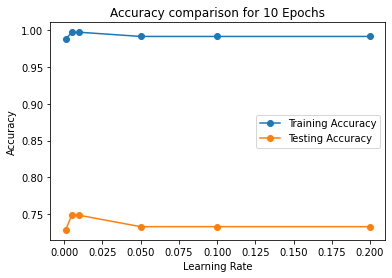

Current learning rate: 0.001
Fold: 0, Train Acc: 1.0, Validation Acc: 0.7389705882352942
Fold: 1, Train Acc: 0.9908088235294118, Validation Acc: 0.7279411764705882
Fold: 2, Train Acc: 1.0, Validation Acc: 0.7794117647058824
Fold: 3, Train Acc: 1.0, Validation Acc: 0.7058823529411765
Fold: 4, Train Acc: 1.0, Validation Acc: 0.7426470588235294
Train List Mean: 0.9981617647058822, Validation List Mean: 0.7389705882352942
Current learning rate: 0.005
Fold: 0, Train Acc: 1.0, Validation Acc: 0.7904411764705882
Fold: 1, Train Acc: 1.0, Validation Acc: 0.7058823529411765
Fold: 2, Train Acc: 1.0, Validation Acc: 0.7536764705882353
Fold: 3, Train Acc: 1.0, Validation Acc: 0.7205882352941176
Fold: 4, Train Acc: 1.0, Validation Acc: 0.7573529411764706
Train List Mean: 1.0, Validation List Mean: 0.7455882352941177
Current learning rate: 0.01
Fold: 0, Train Acc: 1.0, Validation Acc: 0.7904411764705882
Fold: 1, Train Acc: 1.0, Validation Acc: 0.7058823529411765
Fold: 2, Train Acc: 1.0, Validation Ac

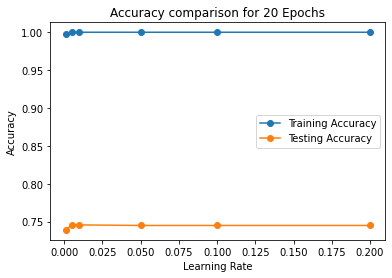

Current learning rate: 0.001
Fold: 0, Train Acc: 1.0, Validation Acc: 0.7389705882352942
Fold: 1, Train Acc: 1.0, Validation Acc: 0.7279411764705882
Fold: 2, Train Acc: 1.0, Validation Acc: 0.7794117647058824
Fold: 3, Train Acc: 1.0, Validation Acc: 0.7058823529411765
Fold: 4, Train Acc: 1.0, Validation Acc: 0.7426470588235294
Train List Mean: 1.0, Validation List Mean: 0.7389705882352942
Current learning rate: 0.005
Fold: 0, Train Acc: 1.0, Validation Acc: 0.7904411764705882
Fold: 1, Train Acc: 1.0, Validation Acc: 0.7058823529411765
Fold: 2, Train Acc: 1.0, Validation Acc: 0.7536764705882353
Fold: 3, Train Acc: 1.0, Validation Acc: 0.7205882352941176
Fold: 4, Train Acc: 1.0, Validation Acc: 0.7573529411764706
Train List Mean: 1.0, Validation List Mean: 0.7455882352941177
Current learning rate: 0.01
Fold: 0, Train Acc: 1.0, Validation Acc: 0.7904411764705882
Fold: 1, Train Acc: 1.0, Validation Acc: 0.7058823529411765
Fold: 2, Train Acc: 1.0, Validation Acc: 0.7536764705882353
Fold: 3,

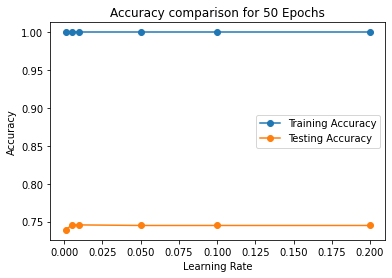

In [89]:

train_data, test_data = split_dataset(all_data)
print("Split dataset")
fold_num = 5
perceptron = Perceptron()
all_data_train, all_data_label = get_features_labels(train_data, 'Label')
all_data_train = feature_extraction(all_data_train, vocab)
df = pd.DataFrame(all_data_train)
df['Label'] = all_data_label
fold_data_list = get_kfold_split(df, fold_num)
print("Extracted all features")
max_iter_list = [1,10,20,50]
learning_rate_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
print("Starting model iteration")
for iter in max_iter_list:
    train_iter_list = []
    val_iter_list = []
    for l in learning_rate_list:
        print("Current learning rate:", l)
        train_learn_list = []
        val_learn_list = []
        for ind in range(fold_num):
            # print("Current index :", ind)
            X, X_test = get_train_test_data(fold_data_list,ind)
            # print(len(X), len(X_test))
            # X, y = get_features_labels(train_data, 'Label')
            # X = feature_extraction(X, vocab)
            # logistic.train_cross_validation(X,y, l, 1)
            perceptron.train_cross_validation(X.drop('Label',1).to_numpy(),X['Label'].to_numpy(), l, iter)
            # X_test,y_test = get_features_labels(test_data, 'Label')
            # X_test = feature_extraction(X_test, vocab)
            predicted_train_labels_logistic = perceptron.predict_cross_validation(X.drop('Label',1).to_numpy())
            predicted_test_labels_logistic = perceptron.predict_cross_validation(X_test.drop('Label',1).to_numpy())
            # train_accuracy, val_accuracy = eval(train_data['Label'].tolist(), predicted_train_labels_logistic, test_data['Label'].tolist(),predicted_test_labels_logistic)
            train_accuracy, val_accuracy = eval(X['Label'].to_numpy(), predicted_train_labels_logistic, X_test['Label'].to_numpy(),predicted_test_labels_logistic)
            print('Fold: {}, Train Acc: {}, Validation Acc: {}'.format(ind, train_accuracy, val_accuracy))
            train_learn_list.append(train_accuracy)
            val_learn_list.append(val_accuracy)
            # print('Train List: {}, Validation List: {}'.format(train_learn_list, val_learn_list))
        train_mean = np.mean(train_learn_list)
        val_mean = np.mean(val_learn_list)
        print('Train List Mean: {}, Validation List Mean: {}'.format(train_mean, val_mean))
        train_iter_list.append(train_mean)
        val_iter_list.append(val_mean)
    plot_curves(learning_rate_list, val_iter_list, train_iter_list, iter)

In [45]:
train_iter_list

[0.9773529411764705,
 0.9773529411764705,
 0.9683823529411765,
 0.9683823529411765,
 0.9683823529411765]

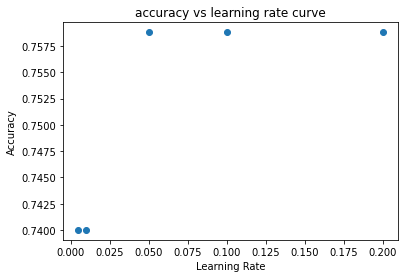

In [46]:
import matplotlib.pyplot as plt
plt.scatter(learning_rate_list,val_iter_list)
plt.title("accuracy vs learning rate curve")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.show()

In [86]:
"""
You may need to import necessary modules like numpy and pandas. However, you can't use any external
libraries such as sci-kit learn, etc. to implement logistic regression and the training of the logistic function.
The implementation must be done completely by yourself.

We are allowing you to use two packages from nltk for text processing: nltk.stem and nltk.tokenize. You cannot import
nltk in general, but we are allowing the use of these two packages only. We will check the code in your programs to
make sure this is the case and if other packages in nltk are used then we will deduct points from your assignment.
"""

"""
This is a Python class meant to represent the logistic model and any sort of feature processing that you may do. You 
have a lot of flexibility on how you want to implement the training of the logistic function but below I have listed 
functionality that should not change:
    - Arguments to the __init__ function 
    - Arguments and return statement of the train function
    - Arguments and return statement of the predict function 


When you want the program (logistic) to train on a dataset, the train function will only take one input which is the 
raw copy of the data file as a pandas dataframe. Below, is example code of how this is done:

    data = pd.read_csv('data.csv', index_col=0)
    model = Logistic()
    model.train(data) # Train the model on data.csv


It is assumed when this program is evaluated, the predict function takes one input which is the raw copy of the
data file as a pandas dataframe and produces as output the list of predicted labels. Below is example code of how this 
is done:

    data = pd.read_csv('data.csv', index_col=0)
    model = Logistic()
    predicted_labels = model.predict(data) # Produce predictions using model on data.csv

I have added several optional helper methods for you to use in building the pipeline of training the logistic function. 
It is up to your discretion on if you want to use them or add your own methods.
"""
import numpy as np
from numpy.lib.function_base import gradient
import Preprocess as Pre

class Logistic():
    def __init__(self):
        """
        The __init__ function initializes the instance attributes for the class. There should be no inputs to this
        function at all. However, you can setup whatever instance attributes you would like to initialize for this
        class. Below, I have just placed as an example the weights and bias of the logistic function as instance
        attributes.
        """
        self.vocabulary = None
        self.weights = None
        self.bias = None

    def get_vocab(self, dataset):
        self.vocabulary = Pre.build_vocab(dataset)
    
    def sigmoid(self, z):
	    return(1 / (1 + np.exp(-z))) 
    
    def feature_extraction(self, data):
        """
        Optional helper method to code the feature extraction function to transform the raw dataset into a processed
        dataset to be used in training.
        """
        df = []
        for i in range(0, data.shape[0]):
            df.append(Pre.get_vector(data.iloc[i]['Text'], self.vocabulary))
        return np.array(df)

    def logistic_loss(self, predicted_label, true_label):
        """
        Optional helper method to code the loss function.
        """

        return -np.sum(np.dot(true_label, np.log(predicted_label)), np.dot(1-true_label, np.log(1-predicted_label)))

    def stochastic_gradient_descent(self, data, error):
        """
        Optional helper method to compute a gradient update for a single point.
        """

        return np.dot(data, error)

    def update_weights(self, learning_rate, gradient):
        """
        Optional helper method to update the weights during stochastic gradient descent.
        """
        new_weights = learning_rate*gradient
        self.weights -= new_weights

    def update_bias(self, learning_rate, error):
        """
        Optional helper method to update the bias during stochastic gradient descent.
        """
        new_bias = np.dot(learning_rate,error)
        self.bias -= new_bias

    def predict_labels_cross_Validation(self, data_point):
        """
        Optional helper method to produce predictions for a single data point
        """
        return np.round(self.sigmoid(np.dot(data_point, self.weights) + self.bias))

    def predict_labels(self, data_point):
        """
        Optional helper method to produce predictions for a single data point
        """
        return np.round(self.sigmoid(np.dot(data_point, self.weights)))

    def train(self, labeled_data, learning_rate=0.1, max_epochs=50):
        """
        You must implement this function and it must take in as input data in the form of a pandas dataframe. This
        dataframe must have the label of the data points stored in a column called 'Label'. For example, the column
        labeled_data['Label'] must return the labels of every data point in the dataset. Additionally, this function
        should not return anything.

        The hyperparameters for training will be the learning rate and maximum number of epochs. Once you find the
        optimal values, update the default values for both the learning rate and max epochs keyword argument.

        The goal of this function is to train the logistic function on the labeled data. Feel free to code this
        however you want.
        """
        self.get_vocab(labeled_data)
        X, y = Pre.get_features_labels(labeled_data, 'Label')
        X = self.feature_extraction(X)

        # bias = np.ones((X.shape[0], 1))
        # X = np.concatenate((bias, X), axis=1)        

        # initialize weights
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for step in range(0, max_epochs):
            for idx, x_feature in enumerate(X):
                scores = np.dot(x_feature, self.weights) + self.bias
                prediction = self.sigmoid(scores)

                # Update weights with gradient
                output_error_signal = prediction - y[idx]
                gradient = self.stochastic_gradient_descent(x_feature, output_error_signal)
                self.update_weights(learning_rate, gradient)
                self.update_bias(learning_rate, output_error_signal)
    
    def train_cross_validation(self, X, y, learning_rate = 0.1, max_epochs = 50):
        # bias = np.ones((X.shape[0], 1))
        # X = np.concatenate((bias, X), axis=1)        

        # initialize weights
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for step in range(0, max_epochs):
            for idx, x_feature in enumerate(X):
                scores = np.dot(x_feature, self.weights) + self.bias
                prediction = self.sigmoid(scores)

                # Update weights with gradient
                output_error_signal = prediction - y[idx]
                gradient = self.stochastic_gradient_descent(x_feature, output_error_signal)
                self.update_weights(learning_rate, gradient)
                self.update_bias(learning_rate, output_error_signal)

    def predict(self, data):
        predicted_labels = []
        """
        This function is designed to produce labels on some data input. The only input is the data in the form of a 
        pandas dataframe. 

        Finally, you must return the variable predicted_labels which should contain a list of all the 
        predicted labels on the input dataset. This list should only contain integers  that are either 0 (negative) or 1
        (positive) for each data point.

        The rest of the implementation can be fully customized.
        """
        X, y = Pre.get_features_labels(data, 'Label')
        
        X = self.feature_extraction(X)

        bias = np.ones((X.shape[0], 1))
        X = np.concatenate((bias, X), axis=1)

        for feature in X:
            predicted_labels.append(self.predict_labels(feature))
        return predicted_labels

    def predict_cross_validation(self, X):
        predicted_labels = []
        for feat in X:
            predicted_labels.append(self.predict_labels_cross_Validation(feat))
        return predicted_labels

In [54]:


logistic = Logistic()
# X, y = get_features_labels(train_data, 'Label')
# X = feature_extraction(X, vocab)
print("Trainig started")
logistic.train_cross_validation(X,y)
print("Model trained")
# perceptron.train(X, y, vocab)
X_test,y_test = get_features_labels(test_data, 'Label')
X_test = feature_extraction(X_test, vocab)
predicted_train_labels_logistic = logistic.predict_cross_validation(X)
predicted_test_labels_logistic = logistic.predict_cross_validation(X_test)
train_accuracy, val_accuracy = eval(train_data['Label'].tolist(), predicted_train_labels_logistic, test_data['Label'].tolist(),predicted_test_labels_logistic)
print("Train:", train_accuracy)
print("Test:", val_accuracy)


Trainig started
Model trained


C:\Users\garga\AppData\Local\Temp/ipykernel_36820/3622175329.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_features = df.drop(label_column_name, 1)


Train: 0.9147058823529411
Test: 0.6411764705882353


Split dataset


C:\Users\garga\AppData\Local\Temp/ipykernel_36820/3622175329.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_features = df.drop(label_column_name, 1)


Extracted all features
Starting model iteration
Current learning rate: 0.001
Fold: 0, Train Acc: 0.8409926470588235, Validation Acc: 0.7683823529411765
Fold: 1, Train Acc: 0.8492647058823529, Validation Acc: 0.7463235294117647


C:\Users\garga\AppData\Local\Temp/ipykernel_36820/983552918.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  logistic.train_cross_validation(X.drop('Label',1).to_numpy(),X['Label'].to_numpy(), l, iter)
C:\Users\garga\AppData\Local\Temp/ipykernel_36820/983552918.py:31: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  predicted_train_labels_logistic = logistic.predict_cross_validation(X.drop('Label',1).to_numpy())
C:\Users\garga\AppData\Local\Temp/ipykernel_36820/983552918.py:32: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  predicted_test_labels_logistic = logistic.predict_cross_validation(X_test.drop('Label',1).to_numpy())


Fold: 2, Train Acc: 0.8492647058823529, Validation Acc: 0.7610294117647058
Fold: 3, Train Acc: 0.8483455882352942, Validation Acc: 0.7463235294117647
Fold: 4, Train Acc: 0.8492647058823529, Validation Acc: 0.7426470588235294
Train List Mean: 0.8474264705882353, Validation List Mean: 0.7529411764705881
Current learning rate: 0.005
Fold: 0, Train Acc: 0.8786764705882353, Validation Acc: 0.7720588235294118
Fold: 1, Train Acc: 0.8841911764705882, Validation Acc: 0.7536764705882353
Fold: 2, Train Acc: 0.8841911764705882, Validation Acc: 0.7536764705882353
Fold: 3, Train Acc: 0.8841911764705882, Validation Acc: 0.7536764705882353
Fold: 4, Train Acc: 0.9016544117647058, Validation Acc: 0.7316176470588235
Train List Mean: 0.8865808823529411, Validation List Mean: 0.7529411764705882
Current learning rate: 0.01
Fold: 0, Train Acc: 0.9053308823529411, Validation Acc: 0.7794117647058824
Fold: 1, Train Acc: 0.8970588235294118, Validation Acc: 0.7389705882352942
Fold: 2, Train Acc: 0.910845588235294

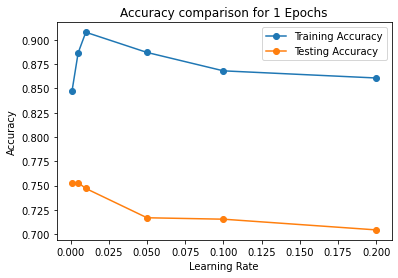

Current learning rate: 0.001
Fold: 0, Train Acc: 0.9402573529411765, Validation Acc: 0.7977941176470589
Fold: 1, Train Acc: 0.9420955882352942, Validation Acc: 0.7647058823529411
Fold: 2, Train Acc: 0.9384191176470589, Validation Acc: 0.8051470588235294
Fold: 3, Train Acc: 0.9411764705882353, Validation Acc: 0.7426470588235294
Fold: 4, Train Acc: 0.9365808823529411, Validation Acc: 0.75
Train List Mean: 0.9397058823529412, Validation List Mean: 0.7720588235294118
Current learning rate: 0.005
Fold: 0, Train Acc: 0.9954044117647058, Validation Acc: 0.7647058823529411
Fold: 1, Train Acc: 0.9972426470588235, Validation Acc: 0.7463235294117647
Fold: 2, Train Acc: 0.9917279411764706, Validation Acc: 0.7867647058823529
Fold: 3, Train Acc: 0.9963235294117647, Validation Acc: 0.7316176470588235
Fold: 4, Train Acc: 0.9908088235294118, Validation Acc: 0.7720588235294118
Train List Mean: 0.9943014705882354, Validation List Mean: 0.7602941176470588
Current learning rate: 0.01
Fold: 0, Train Acc: 1.

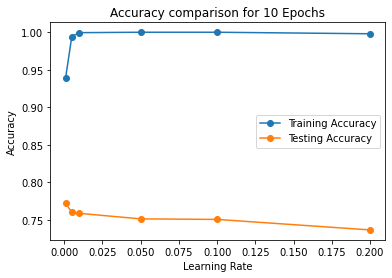

Current learning rate: 0.001
Fold: 0, Train Acc: 0.9724264705882353, Validation Acc: 0.8051470588235294
Fold: 1, Train Acc: 0.9742647058823529, Validation Acc: 0.7647058823529411
Fold: 2, Train Acc: 0.9733455882352942, Validation Acc: 0.8051470588235294
Fold: 3, Train Acc: 0.9705882352941176, Validation Acc: 0.75
Fold: 4, Train Acc: 0.9678308823529411, Validation Acc: 0.7573529411764706
Train List Mean: 0.9716911764705882, Validation List Mean: 0.7764705882352941
Current learning rate: 0.005
Fold: 0, Train Acc: 1.0, Validation Acc: 0.7683823529411765
Fold: 1, Train Acc: 0.9990808823529411, Validation Acc: 0.7463235294117647
Fold: 2, Train Acc: 1.0, Validation Acc: 0.8125
Fold: 3, Train Acc: 1.0, Validation Acc: 0.7352941176470589
Fold: 4, Train Acc: 1.0, Validation Acc: 0.7647058823529411
Train List Mean: 0.9998161764705882, Validation List Mean: 0.7654411764705882
Current learning rate: 0.01
Fold: 0, Train Acc: 1.0, Validation Acc: 0.7647058823529411
Fold: 1, Train Acc: 1.0, Validatio

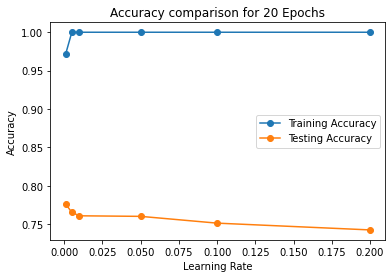

Current learning rate: 0.001
Fold: 0, Train Acc: 0.9954044117647058, Validation Acc: 0.7830882352941176
Fold: 1, Train Acc: 0.9972426470588235, Validation Acc: 0.7536764705882353
Fold: 2, Train Acc: 0.9944852941176471, Validation Acc: 0.8051470588235294
Fold: 3, Train Acc: 0.9963235294117647, Validation Acc: 0.7316176470588235
Fold: 4, Train Acc: 0.9926470588235294, Validation Acc: 0.7683823529411765
Train List Mean: 0.9952205882352942, Validation List Mean: 0.7683823529411764
Current learning rate: 0.005
Fold: 0, Train Acc: 1.0, Validation Acc: 0.7610294117647058
Fold: 1, Train Acc: 1.0, Validation Acc: 0.7573529411764706
Fold: 2, Train Acc: 1.0, Validation Acc: 0.8014705882352942
Fold: 3, Train Acc: 1.0, Validation Acc: 0.7389705882352942
Fold: 4, Train Acc: 1.0, Validation Acc: 0.7610294117647058
Train List Mean: 1.0, Validation List Mean: 0.7639705882352941
Current learning rate: 0.01
Fold: 0, Train Acc: 1.0, Validation Acc: 0.7536764705882353
Fold: 1, Train Acc: 1.0, Validation Ac

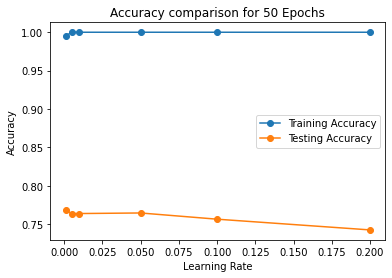

In [85]:

train_data, test_data = split_dataset(all_data)
print("Split dataset")
fold_num = 5
logistic = Logistic()
all_data_train, all_data_label = get_features_labels(train_data, 'Label')
all_data_train = feature_extraction(all_data_train, vocab)
df = pd.DataFrame(all_data_train)
df['Label'] = all_data_label
fold_data_list = get_kfold_split(df, fold_num)
print("Extracted all features")
max_iter_list = [1,10,20,50]
learning_rate_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
print("Starting model iteration")
for iter in max_iter_list:
    train_iter_list = []
    val_iter_list = []
    for l in learning_rate_list:
        print("Current learning rate:", l)
        train_learn_list = []
        val_learn_list = []
        for ind in range(fold_num):
            # print("Current index :", ind)
            X, X_test = get_train_test_data(fold_data_list,ind)
            # print(len(X), len(X_test))
            # X, y = get_features_labels(train_data, 'Label')
            # X = feature_extraction(X, vocab)
            # logistic.train_cross_validation(X,y, l, 1)
            logistic.train_cross_validation(X.drop('Label',1).to_numpy(),X['Label'].to_numpy(), l, iter)
            # X_test,y_test = get_features_labels(test_data, 'Label')
            # X_test = feature_extraction(X_test, vocab)
            predicted_train_labels_logistic = logistic.predict_cross_validation(X.drop('Label',1).to_numpy())
            predicted_test_labels_logistic = logistic.predict_cross_validation(X_test.drop('Label',1).to_numpy())
            # train_accuracy, val_accuracy = eval(train_data['Label'].tolist(), predicted_train_labels_logistic, test_data['Label'].tolist(),predicted_test_labels_logistic)
            train_accuracy, val_accuracy = eval(X['Label'].to_numpy(), predicted_train_labels_logistic, X_test['Label'].to_numpy(),predicted_test_labels_logistic)
            print('Fold: {}, Train Acc: {}, Validation Acc: {}'.format(ind, train_accuracy, val_accuracy))
            train_learn_list.append(train_accuracy)
            val_learn_list.append(val_accuracy)
            # print('Train List: {}, Validation List: {}'.format(train_learn_list, val_learn_list))
        train_mean = np.mean(train_learn_list)
        val_mean = np.mean(val_learn_list)
        print('Train List Mean: {}, Validation List Mean: {}'.format(train_mean, val_mean))
        train_iter_list.append(train_mean)
        val_iter_list.append(val_mean)
    plot_curves(learning_rate_list, val_iter_list, train_iter_list, iter)

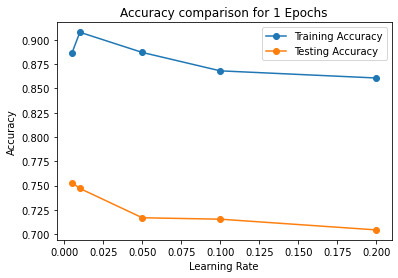

In [82]:
plot_curves(learning_rate_list, val_iter_list, train_iter_list, 1)